# 21M.387 Fundamentals of Music Processing
## Problem Set 9: Audio Decomposition

Make sure all your answers and plots display when the code block is run. You can leave word-based answers in code comments or markdown cells.

You may use any fmplib functions from __previous__ units in your answers. You may __not__ use any fmplib functions from the current unit in your answers (unless explicitly noted). But you can use the current unit's fmplib for testing your code.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact
import sys
sys.path.append("..")
import fmplib as fmp

plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['image.interpolation'] = 'nearest'

fmp.documentation_button()

## Exercise 1

The STFT $\mathcal{X}[h,k]$ is a $51 \times 14$ matrix created from a signal $x[n]$ with the parameters:
- $N = 100$, the window length
- $H = 75$, the hop size
- Rectangular Window
- No centering

What is the windowing effect that must be "undone" to properly reconstruct the signal $x[n]$ from $\mathcal{X}[h,k]$? In other words, what function $W[n]$ must be used to create
$$x_r[n] = {\tilde x[n] \over W[n]}$$

Create $W[n]$ and plot it.

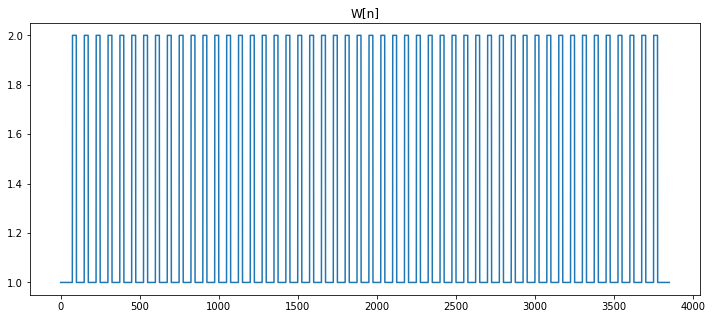

In [15]:
k = 14
hops = 51
N = 100
H = 75
Wn = np.zeros(N + (hops-1) * H)
win = np.ones(N)
for n in range(hops):
    win_shift = np.zeros(len(win_sum))
    win_shift[n*H:n*H+N] += win
    Wn += win_shift

plt.title('W[n]')
plt.plot(Wn)
plt.show()

## Exercise 2a

From the given signal, create the harmonic and percussive median filtered power spectrograms:
$\tilde{\mathcal{Y}}^h[n,k]$ and $\tilde{\mathcal{Y}}^p[n,k]$ with parameters:
- $N = 4096$
- $H = 1024$
- $L_h = 19$ (harmonic median filter length)
- $L_p = 31$ (percussive median filter length)

You can use `fmp.stft` and `scipy.signal.medfilt`.

Set them to variables `filt_h` and `filt_h`, and plot them.

In [ ]:
from scipy.signal import medfilt
snd = fmp.load_wav("audio/latin_loop.wav")
fs = 22050

filt_h = ...
filt_p = ...

## Exercise 2b

Instead of creating the usual two masks, create three binary masks from the filtered spectrograms:

$$
\mathcal{M}^h[n,k] = 
\left\{
\begin{aligned} 
1,& \text{  if } \tilde{\mathcal{Y}}^h[n,k] \ge \beta \cdot \tilde{\mathcal{Y}}^p[n,k] \\ 
0,& \text{  otherwise} \\ 
\end{aligned} 
\right. 
$$

$$
\mathcal{M}^p[n,k] = 
\left\{
\begin{aligned} 
1,& \text{  if } \tilde{\mathcal{Y}}^p[n,k] \gt \beta \cdot \tilde{\mathcal{Y}}^h[n,k] \\  
0,& \text{  otherwise} \\ 
\end{aligned} 
\right. 
$$

$$
\mathcal{M}^r[n,k] = 1 - \left( \tilde{\mathcal{M}}^h[n,k] + \tilde{\mathcal{M}}^p[n,k] \right)
$$

where $\beta$ is the _separation factor_ and $\beta \ge 1$.  

$\mathcal{M}^r[n,k]$ is the "residual" mask that captures sounds which are neither purely percussive or purely harmonic.

Write the function `make_three_masks` which creates and returns these three masks.  
Inputs:
- `filt_h`: $\tilde{\mathcal{Y}}^h[n,k]$ 
- `filt_p`: $\tilde{\mathcal{Y}}^p[n,k]$
- beta: $\beta$

Output:
- a tuple of $\mathcal{M}^h[n,k]$, $\mathcal{M}^p[n,k]$, and $\mathcal{M}^r[n,k]$

In [ ]:
def make_three_masks(filt_h, filt_p, beta):
    pass


Create these masks with $\beta = 1.5$ (as `mask_h`, `mask_p`, `mask_r`) and plot them.

In [ ]:
mask_h = ...
mask_p = ...
mask_r = ...

## Exercise 3

- Reconstruct three signals $x^h[n]$, $x^p[n]$, and $x^r[n]$ from the above masks.
- You can use `fmp.istft()`
- Listen to the audio. 
- Describe what you hear.
- Try different values of $\beta$ and describe how that changes the results.

## Exercise 4

Consider the following matrix $V$, a $K \times N$ matrix with non-negative values and $K=9$, $N=7$:
<img src="images/pset_nmf.png" width=300>

Here we only consider the case of perfect non-negative decomposition, such that $V = WH$ exactly and all entries in $W$ and $H$ are non-negative.

By hand (i.e., do not run the NMF solver), determine two different decompositions, that is, two different paris of $W$ and $H$ that satisfy $V = WH$ where the rank of the decomposition is $R=3$. Do not make the second pair trivailly different from the first (by reordering rows and columns, for example).

Provide your answers as python arrays (`W1`, `H1` and `W2`, `H2`). Note that $V$ (above) is displayed with origin at the bottom left. 

In [ ]:
W1 = ...
H1 = ...

W2 = ...
H2 = ...


## Exercise 5

In order to create a useful matrix factorization, we can pre-seed $W$ with the known pitches of the music. You will do this in two parts.  
First, create the function `make_nmf_note_model(fs, fft_len, pitch)`

Inputs:
- `fs`: The sample rate
- `fft_len`: $N$, the FFT length used in making the STFT
- `pitch`: a MIDI pitch number

Output:
- A 1D vector that is a spectral model for the given pitch (with length $N/2+1$).

Strategy:  
- The resulting vector has zones of non-zero values for each harmonic of the given pitch, and zeros everywhere else.
- The first harmonic zone (fundamental frequency) has a range of $\pm 0.5$ semitones around the given pitch.
- The rest of the harmonic zones are integer multiples of these frequency bounds.
- The magnitude of each zone is $1/h$ where $h$ is the harmonic number ($h=1$ is the fundamental, $h=2$ is the 2nd harmonic, etc...).
- Fill in as many harmonic zones as will fit within the output vector.

In [ ]:
def make_nmf_note_model(fs, fft_len, pitch):
    pass


Create pitch models for pitches 60 and 72 (setting `pm_60` and `pm_72`) with $F_s = 22050$ and $N = 4096$. Plot these two functions.

In [ ]:
pm_60 = ...
pm_72 = ...

## Exercise 6

Continuing, create the function `make_nmf_template(fs, fft_len, pitches)` with the help of the above function.

Inputs:
- `fs`: The sample rate
- `fft_len`: $N$, the FFT length used in making the STFT
- `pitches`: a list of pitch

Output:
- $W$ - the initial templates matrix that contains one pitch model at each column for each of the given pitches


In [ ]:
def make_nmf_template(fs, fft_len, pitches):
    pass

Test your function by creating $W$ with `fs` and `fft_len` as above for pitches of the C major scale from C4 to C5, inclusive (setting `W_C_maj`). Then plot $W$.

In [ ]:
W_C_maj = ...


## Exercise 7

In this Exercise, you will run the NMF algorithm on a short snippet of the Mozart _Piano Sonata in F_.  
The score is here and the audio below.

<img src="images/mozart_sonata_f.png" width=500>

In [ ]:
snd = fmp.load_wav("audio/mozart_sonata_f.wav")
fs = 22050.
ipd.Audio(snd, rate=fs)

Setup:
- Create the STFT of the audio ($N=4096$, $H=1024$).
- Create the list of pitches found in this score (hint: there are 14).
- Use these pitches to create the initial $W$ matrix.
- Create the initial $H$ matrix to contains all ones.

The NMF algorithm strives to reduce the error $\phi = {\Vert V - WH \Vert}$ where $V$ is the magnitude of the STFT.
- Print the initial value of $\phi$ before running NMF (set `phi_init`).
- Run NMF to produce optimized $W$ and $H$ using `fmp.nmf(V, Wi, Hi)`. It returns a tuple of $W$ and $H$. Set `W_mozart` and `H_mozart`.
- What is the value of $\phi$ with the optimized $W$ and $H$ (set `phi_opt`)?
- Finally, plot $W$ and $H$

In [ ]:
phi_init = ...
W_mozart = ...
H_mozart = ...
phi_opt = ...


## Exercise 8

In this exercise, separate the left and right hands and create two reconstructed audio clips: $x^L[n]$ and $x^R[n]$:

- Beginning with $H$, the activations matrix, create two different (non overlapping) activation matrices: $H^L$ and $H^R$ (setting `H_left` and `H_right`).
- Create soft masks $M^L$ and $M^R$ using the equations described in the lecture notes (setting `mask_left` and `mask_right`).
- Use these masks to create two STFTs: $\mathcal{X}^L[n,k]$ and $\mathcal{X}^R[n,k]$ (setting `stft_left` and `stft_right`).
- Finally, apply the inverse STFT to create the reconstructed audio clips $x^L[n]$ and $x^R[n]$.

Play both audio clips. Describe what you hear. How good was this source separation?

In [ ]:
H_left = ...
H_right = ...
mask_left = ...
mask_right = ...
stft_left = ...
stft_right = ...

# play and describe what you hear.